# Standardization vs Normalization

**Standardization** and **Normalization** are two techniques used in data preprocessing to scale the features of a dataset before feeding them into machine learning models. Both approaches aim to make the data easier for the model to process but achieve this in different ways.

---

## 1. Standardization

Standardization transforms the data to have a **mean of 0** and a **standard deviation of 1**. This is useful when the features in the dataset have different units or ranges, as it ensures that all features contribute equally to the model.

### Formula for Standardization:
\[
z = \frac{x - \mu}{\sigma}
\]
Where:
- \(x\) is the original data point,
- \(\mu\) is the mean of the data,
- \(\sigma\) is the standard deviation of the data.

### After standardization:
- The values are centered around 0.
- The range of the values can vary, but they follow a standard normal distribution (Gaussian with mean 0 and variance 1).

### When to Use Standardization:
- When your data has features that are approximately normally distributed.
- When algorithms like SVM, logistic regression, and linear regression are sensitive to feature scales.

### Example:
Suppose you have the following feature:
- Feature: `[100, 200, 300, 400, 500]`

After standardization:
- The mean will be 0, and the values will be distributed based on the standard deviation.

---

## 2. Normalization

Normalization scales the data to a fixed range, typically **[0, 1]** or **[-1, 1]**. This method is useful when you know the bounds of your data and want to ensure that all features lie within a common range.

### Formula for Normalization:
\[
x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
\]
Where:
- \(x\) is the original data point,
- \(x_{\text{min}}\) and \(x_{\text{max}}\) are the minimum and maximum values in the dataset, respectively.

### After normalization:
- The values will be scaled between 0 and 1 (or another fixed range).
- The shape of the distribution may change, but all data points will lie within the defined range.

### When to Use Normalization:
- When the distribution of data is unknown or non-Gaussian.
- When you need to ensure all values are positive and within a specific range (e.g., for neural networks or distance-based algorithms like K-NN).
- When the data contains outliers that need to be constrained within a specific range.

### Example:
Suppose you have the following feature:
- Feature: `[100, 200, 300, 400, 500]`

After normalization:
- The values will be scaled between 0 and 1. The smallest value will become 0, and the largest will become 1.

---

## Key Differences:

| **Aspect**              | **Standardization**                                        | **Normalization**                                |
|-------------------------|-----------------------------------------------------------|-------------------------------------------------|
| **Goal**                | Centers the data around 0 with a standard deviation of 1.  | Scales the data to a specific range (e.g., [0, 1]). |
| **Formula**             | \[z = \frac{x - \mu}{\sigma}\]                            | \[x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}\] |
| **Effect on Distribution** | Keeps the shape of the original distribution intact.       | Changes the data distribution to fit within a range. |
| **Output Range**        | No fixed range, values can be negative or positive.        | Fixed range, typically [0, 1] or [-1, 1].       |
| **When to Use**         | Use when data is Gaussian (normally distributed) and when algorithms require standardized features. | Use when you need to bound data in a fixed range or when the distribution is unknown/non-Gaussian. |

---

## Use Cases for Machine Learning:

- **Standardization** is preferred for algorithms like:
  - Support Vector Machines (SVM),
  - Logistic Regression,
  - Linear Regression,
  - K-Means,
  - Principal Component Analysis (PCA).

- **Normalization** is useful for algorithms like:
  - Neural Networks (which benefit from features in the same range),
  - K-Nearest Neighbors (K-NN) (which is sensitive to the distance between points),
  - Any algorithm that relies on Euclidean distance.

---

## Summary:

- **Standardization** makes data follow a normal distribution with mean 0 and variance 1.
- **Normalization** scales data into a fixed range, commonly [0, 1].


## Standardization


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('Social_Network_Ads.csv')
print(df.sample(5))

      User ID  Gender  Age  EstimatedSalary  Purchased
19   15621083  Female   48            29000          1
238  15617877  Female   46            82000          0
186  15724402  Female   20            82000          0
252  15795298  Female   48           134000          1
317  15684861    Male   35            55000          0


In [43]:
df=df.iloc[:,2:]

In [44]:
print(df.sample(5))

     Age  EstimatedSalary  Purchased
139   19            25000          0
345   41            63000          0
56    23            48000          0
285   37            93000          1
142   35            59000          0


#### Train Test Split

In [45]:
print(df.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)


(400, 3)
(320, 2)
(80, 2)


#### StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set, it will learn the parameters--stores mean, std etc
scaler.fit(X_train)

#transform train and test sets | returns numpy array
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [47]:
#Converts again to dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

X_train_scaled

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


In [48]:
print(np.round(X_train.describe(),1))
print()
print()
print(np.round(X_train_scaled.describe(),1))

         Age  EstimatedSalary
count  320.0            320.0
mean    38.2          69928.1
std     10.3          34570.1
min     18.0          15000.0
25%     30.0          43000.0
50%     38.0          69500.0
75%     46.0          88000.0
max     60.0         150000.0


         Age  EstimatedSalary
count  320.0            320.0
mean     0.0              0.0
std      1.0              1.0
min     -2.0             -1.6
25%     -0.8             -0.8
50%     -0.0             -0.0
75%      0.8              0.5
max      2.1              2.3


#### Effect of scaling

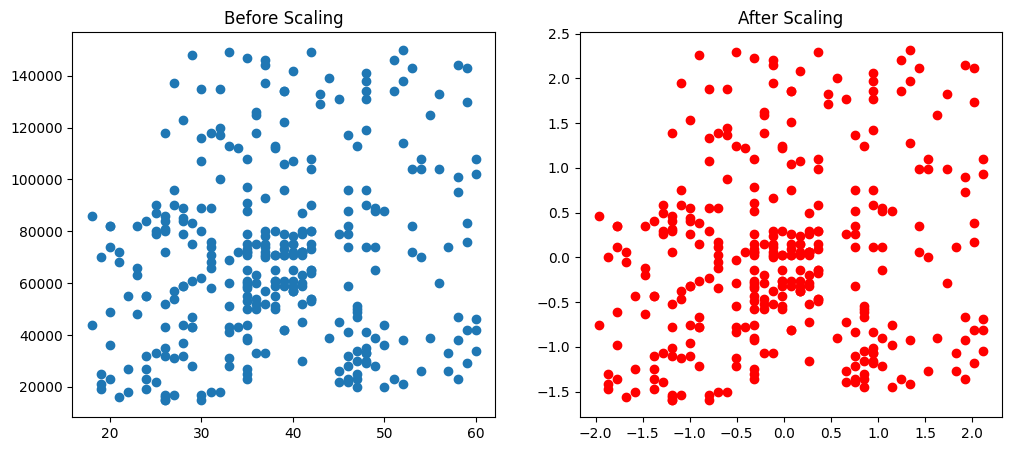

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

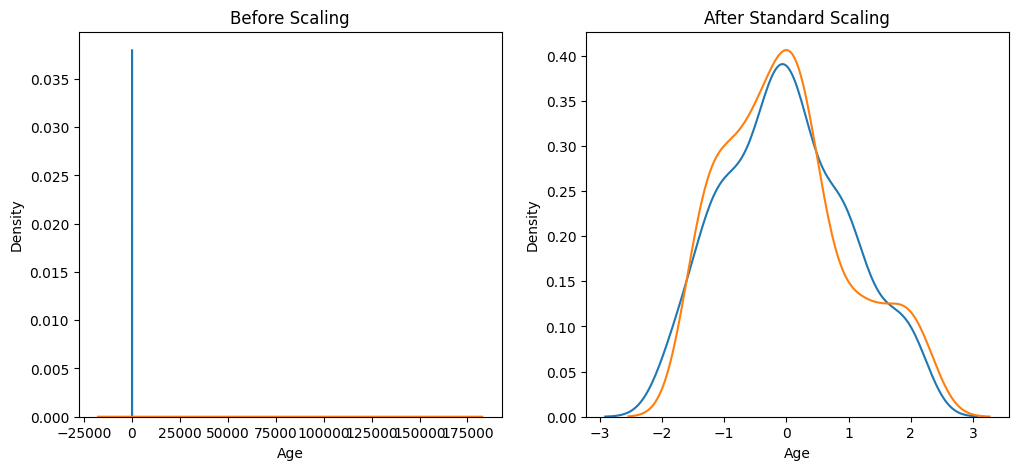

In [50]:
#Probability Density Function -- after scaling , both becomes comparable
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#### Comparison of Distributions

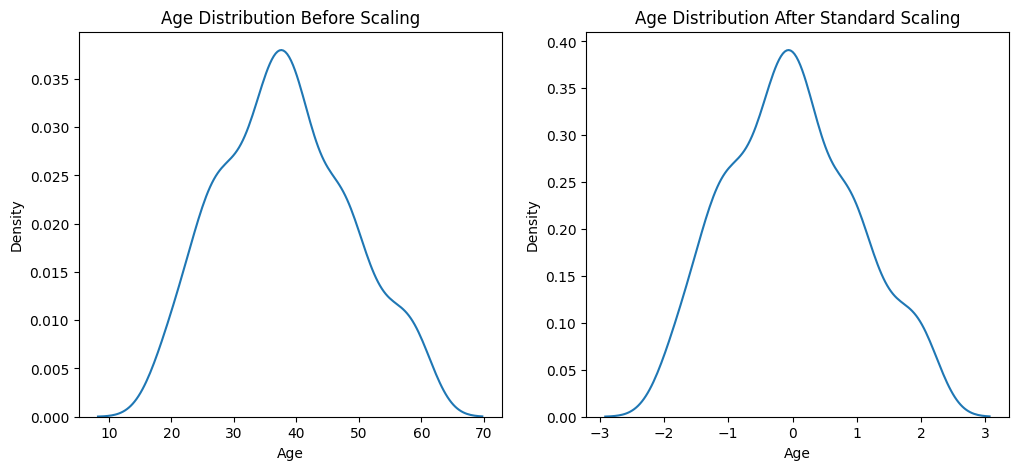

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

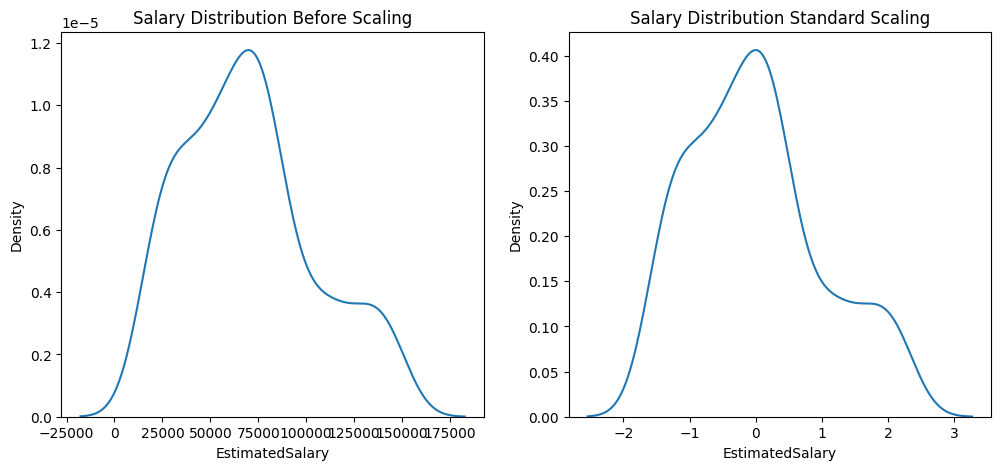

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

##### Note that stanadardization does not deals with outliers, they remains outlier and should be handled explicitely.

## Normalization

Getting only values of quantity not thier units


#### min-max Scaling
1.Xi'=(Xi-Xmin)/(Xmax-Xmin)<br>
2.Range =[0,1] <br>
3.squeezing data in unit hypercube

In [55]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [56]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

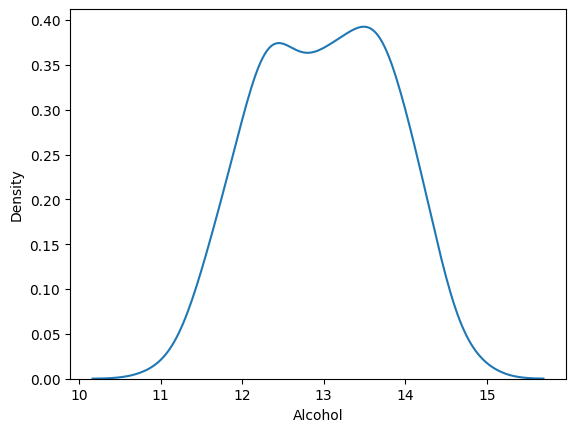

In [57]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

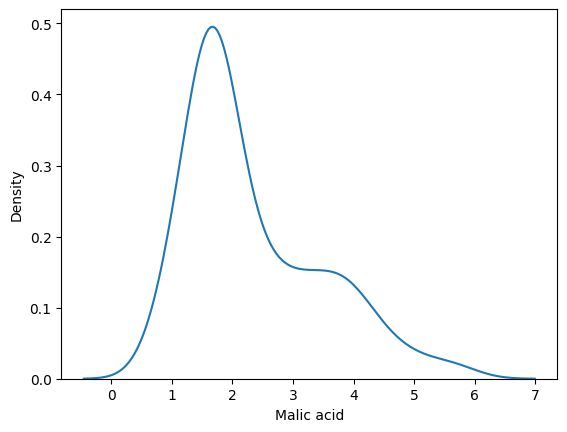

In [58]:

sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

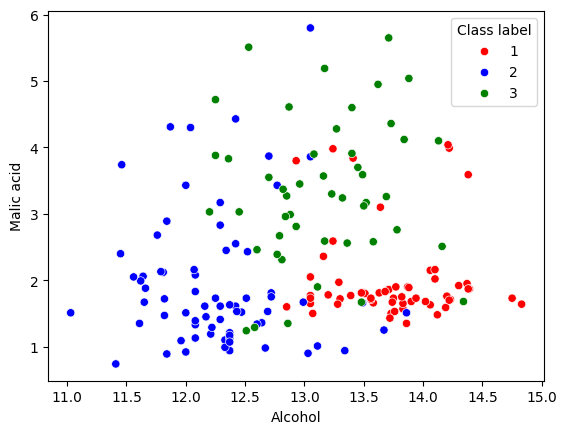

In [64]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [68]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [69]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


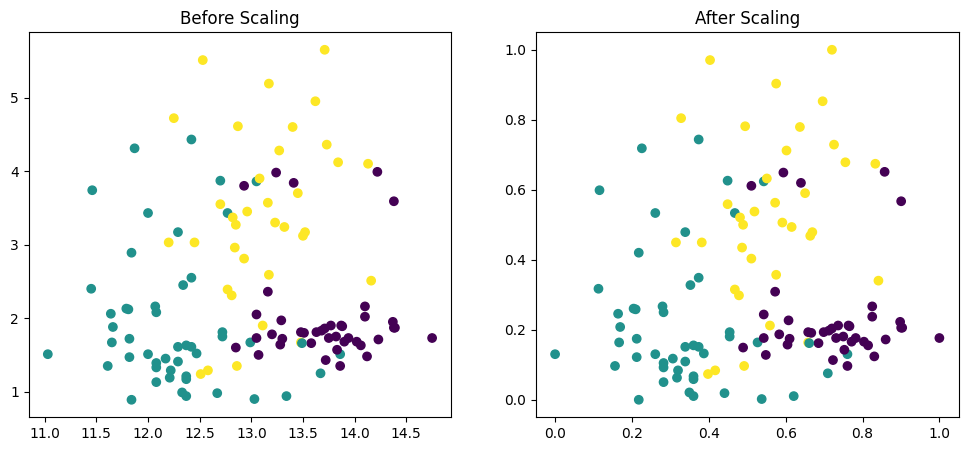

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

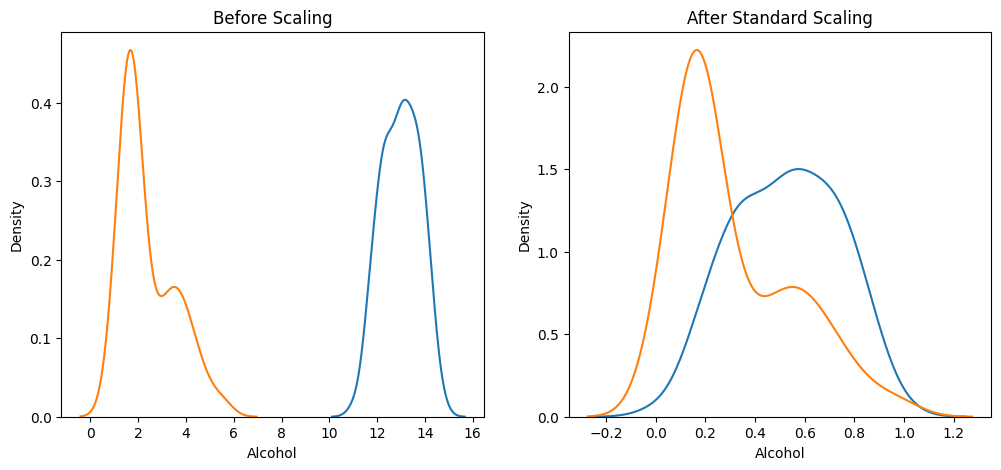

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

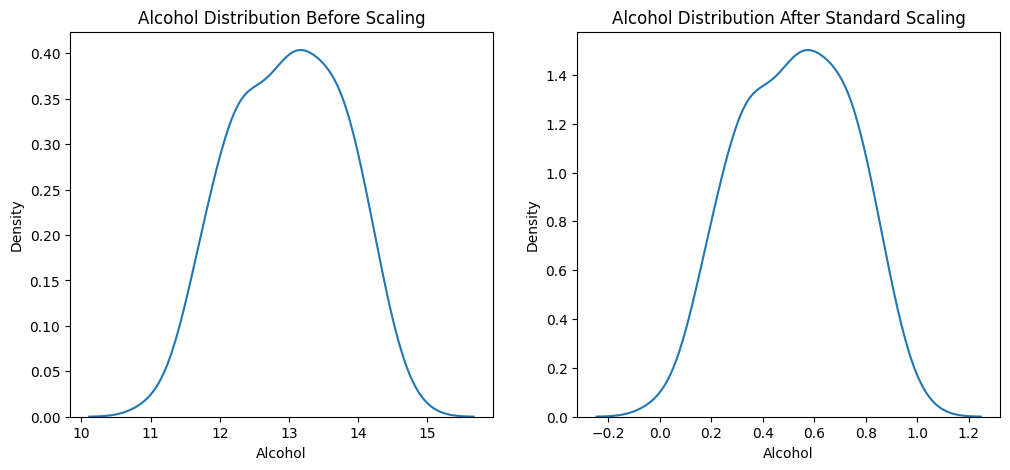

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

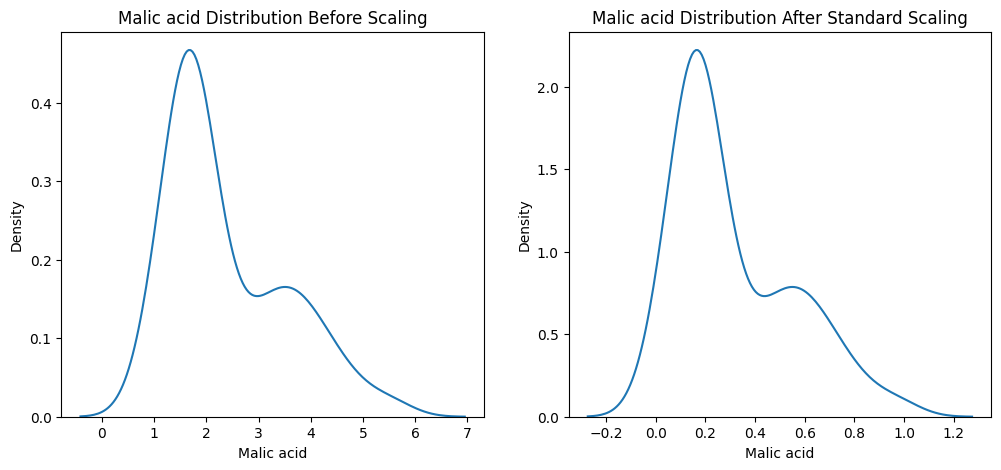

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

##### Mean Normalization 

Xi'=(Xi-Xmean)/(Xmax-Xmin)<br>
Range : [-1,1]


##### MaxAbsScaling
Xi'=Xi/|Xmax|<br>
useful in sparse data

#### Robust Scaling
Xi'=(Xi-Xmedian)/IQR <br>
robus to outliers